In [84]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('R1.csv')

In [74]:
print(df.describe())

       violet_stone_count  bauxite_kg
count          100.000000  100.000000
mean            79.270000    5.986221
std             42.418039    2.177836
min              2.000000    1.728002
25%             48.750000    4.444994
50%             77.000000    5.985403
75%            115.250000    7.643617
max            149.000000    9.832522


In [ ]:
bauxite_kg
mean = valor esperado = 5.986221
std = standard desviation = 2.177836

El valor esperado de bauxita a extraer de un asteroide sera entre => (mean - std ; mean + std)

In [51]:
print(df.corr())
print("\nSiendo la corr", df.corr()['violet_stone_count']['bauxite_kg'], \
      "\nafirmamos que la relacion lineal entre violet_stone_count y bauxite_kg es muy fuerte")
print("")
print("Se advierte que la presencia de correlacion no implica causalidad")

                    violet_stone_count  bauxite_kg
violet_stone_count            1.000000    0.978164
bauxite_kg                    0.978164    1.000000

Siendo la corr 0.9781637250632228 
afirmamos que la relacion lineal entre violet_stone_count y bauxite_kg es muy fuerte

Se advierte, que la presencia de correlacion no implica causalidad


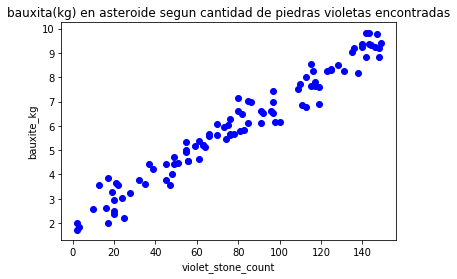

- Confirmamos visualmente la relacion lineal entre variables
- Visualmente no se detectan outliers


In [61]:
plt.scatter(df.violet_stone_count, df.bauxite_kg, c='blue')
plt.xlabel("violet_stone_count")
plt.ylabel("bauxite_kg")
plt.title("bauxita(kg) en asteroide segun cantidad de piedras violetas encontradas")
plt.show()
print("- Confirmamos visualmente la relacion lineal entre variables")
print("- Visualmente no se detectan outliers")

## Tipo de distribucion ?? 

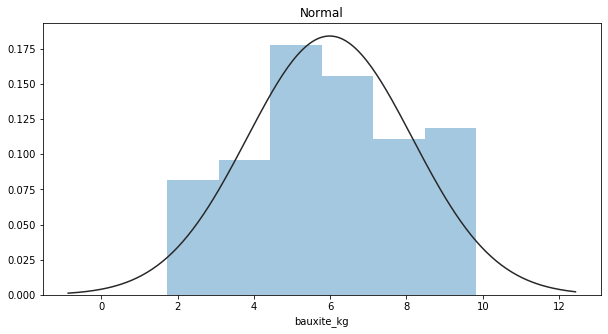

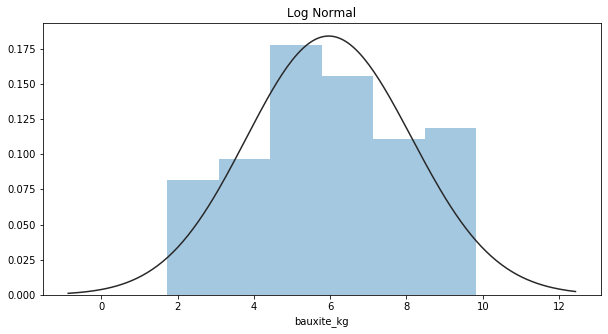

- Pareciera aproximarse a distrib normal, debemos corroborar con un test


In [4]:
x = df.bauxite_kg

plt.figure(1, figsize = [10,5]); plt.title('Normal')
sns.distplot(x, kde=False, fit=stats.norm)

plt.figure(2, figsize = [10,5]); plt.title('Log Normal')
sns.distplot(x, kde=False, fit=stats.lognorm)

plt.show()

print("- Pareciera aproximarse a distrib normal, debemos corroborar con un test")

In [24]:
from scipy.stats import shapiro #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - shapiro test

stat, p = shapiro(df.bauxite_kg)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.973, p=0.038
Sample does not look Gaussian (reject H0)


In [26]:
from scipy.stats import normaltest #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - D’Agostino’s K^2 Test

# normality test
stat, p = normaltest(df.bauxite_kg)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=9.128, p=0.010
Sample does not look Gaussian (reject H0)


In [27]:
from scipy.stats import anderson #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - Anderson-Darling Test

# normality test
result = anderson(df.bauxite_kg)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.489
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


In [ ]:
Hard Fail

Your data may not be normal for lots of different reasons.
Each test looks at the question of whether a sample was drawn from a Gaussian distribution
from a slightly different perspective.

A failure of one normality test means that your data is not normal.
As simple as that.

You can either investigate why your data is not normal and perhaps
use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical
methods instead of the parametric methods.

In [ ]:
Soft Fail

If some of the methods suggest that the sample is Gaussian and some not,
then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian and proceed 
with your chosen parametric statistical methods.

In [ ]:
"https://stackoverflow.com/questions/7781798/seeing-if-data-is-normally-distributed-in-r/7788452#7788452"
se debate que significa en un test, el rechazo o no de H0, leerlo esta muy bueno la rta aceptada y los comentarios.

## Ajusto modelo

In [36]:
from sklearn.linear_model import LinearRegression

In [82]:
X = df.violet_stone_count.to_numpy().reshape(-1, 1)# reshape(-1, 1) porque me falla al hacer .fit(X, y)
y = df.bauxite_kg.to_numpy().reshape(-1, 1)

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Coefficients:  [[0.05151773]]
Intercept (Y axis when X = 0):  [1.89389521]
Mean squared error: 0.24
Coefficient of determination: 0.94


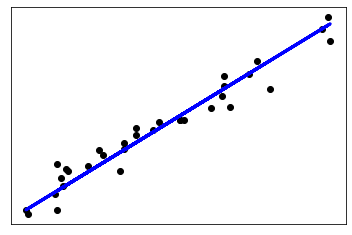

In [109]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: ', regr.coef_)

# The intercept_ 
print('Intercept (Y axis when X = 0): ', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [105]:
#example of use
violet_stones_in_asteroid = 100
x = pd.DataFrame([violet_stones_in_asteroid]).to_numpy().reshape(-1, 1)
regr.predict(x)

array([[7.04566776]])

## Aclaraciones 

In [ ]:
precision instrumento de medicion ?? -> se asume error 0 en instrumentos de medicion
precision conteo de piedras violetas ?? -> se asume que el conteo por asteroide fue correcto en todos los casos